In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../Datasets/kobe.csv')

In [3]:
data.head(10)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7
7,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,10


In [4]:
def resumetable(df):
    print(f'DataFrame shape: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['dtype'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': 'column_name'})
    summary['Missing'] = df.isnull().sum().values
    #구분되는 고윳값 개수를 확인할 수 있다
    summary['Different Values'] = df.nunique().values
    #어떤 값들이 입력되어 있는지 확인해보기 위해 3번째 항목까지 표기
    summary['1er valeur'] = df.loc[0].values
    summary['2e valeur'] = df.loc[1].values
    summary['3e valeur'] = df.loc[2].values
    summary['4e valeur'] = df.loc[3].values
    summary['5e valeur'] = df.loc[4].values
    
    return summary

resumetable(data)

DataFrame shape: (30697, 25)


,column_name,dtype,Missing,Different Values,1er valeur,2e valeur,3e valeur,4e valeur,5e valeur
0,action_type,object,0,57,Jump Shot,Jump Shot,Jump Shot,Jump Shot,Driving Dunk Shot
1,combined_shot_type,object,0,6,Jump Shot,Jump Shot,Jump Shot,Jump Shot,Dunk
2,game_event_id,int64,0,620,10,12,35,43,155
3,game_id,int64,0,1559,20000012,20000012,20000012,20000012,20000012
4,lat,float64,0,457,33.9723,34.0443,33.9093,33.8693,34.0443
5,loc_x,int64,0,489,167,-157,-101,138,0
6,loc_y,int64,0,457,72,0,135,175,0
7,lon,float64,0,489,-118.1028,-118.4268,-118.3708,-118.1318,-118.2698
8,minutes_remaining,int64,0,12,10,10,7,6,6
9,period,int64,0,7,1,1,1,1,2


## Data Visualisation

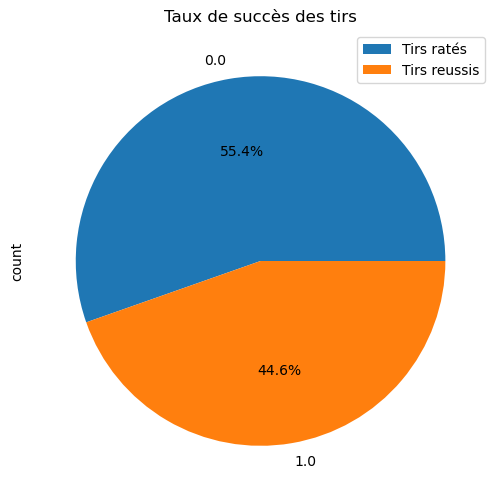

In [5]:
# Camembert des tirs en moyenne 
data['shot_made_flag'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Taux de succès des tirs')
plt.legend(['Tirs ratés', 'Tirs reussis'])
plt.show()

On observe que les tirs de Kobe sont légèrement déséquilibrés en faveur du tir raté. Ce sera à prendre à compte lors de la construction du modèle.

season
1996-97    0.422977
1997-98    0.430864
1998-99    0.458824
1999-00    0.460366
2000-01    0.466667
2001-02    0.458431
2002-03    0.436285
2003-04    0.433260
2004-05    0.436557
2005-06    0.453742
2006-07    0.457885
2007-08    0.468389
2008-09    0.467855
2009-10    0.453725
2010-11    0.446417
2011-12    0.425847
2012-13    0.457831
2013-14    0.406780
2014-15    0.376054
2015-16    0.356223
Name: shot_made_flag, dtype: float64


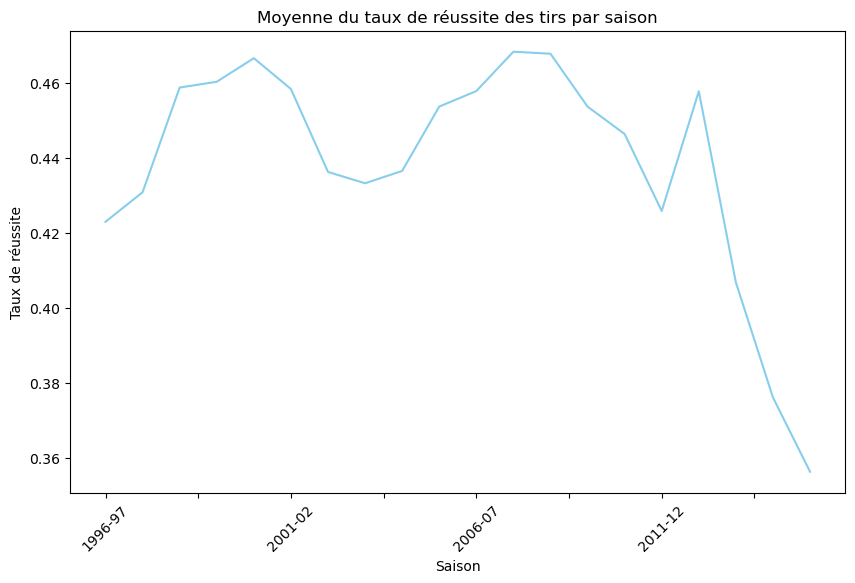

In [6]:
# Calculer la moyenne du taux de réussite des tirs par saison
success_rate_by_season = data.groupby('season')['shot_made_flag'].mean()

# Afficher la moyenne du taux de réussite par saison
print(success_rate_by_season)

# Visualiser la moyenne du taux de réussite des tirs par saison
success_rate_by_season.plot(kind='line', figsize=(10, 6), color='skyblue')
plt.title('Moyenne du taux de réussite des tirs par saison')
plt.xlabel('Saison')
plt.ylabel('Taux de réussite')
plt.xticks(rotation=45)
plt.show()

On observe une oscillation de la moyenne de tir entre 0.42 et 0.47 de la précision des tirs de Kobe, jusqu'en 2013-14 où celle-ci baisse jusqu'à 0.35 en continue.

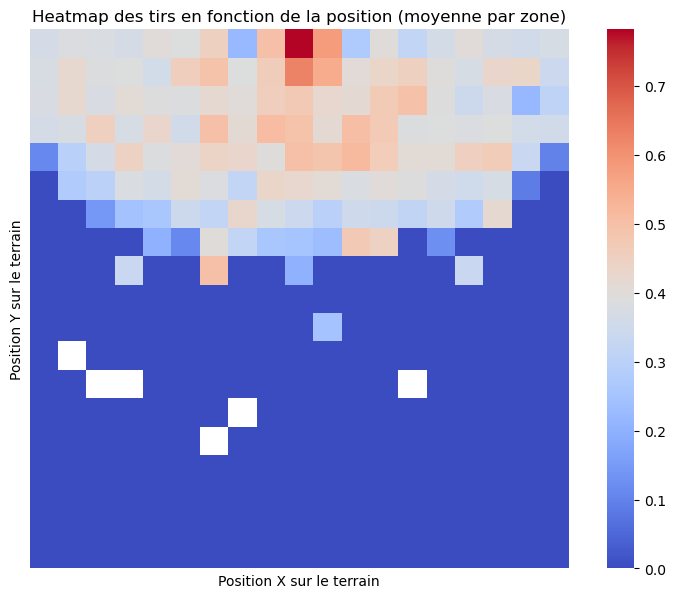

In [7]:
# Définition de la taille de la grille (plus petit = plus précis)
grid_size = 20  # Nombre de cases en X et Y

# Création de la figure
plt.figure(figsize=(10, 7))

# Création d'une grille pour regrouper les tirs
x_bins = np.linspace(data['loc_x'].min(), data['loc_x'].max(), grid_size)
y_bins = np.linspace(data['loc_y'].min(), data['loc_y'].max(), grid_size)

# Calcul du nombre de tirs réussis et tentés par zone
heatmap_data = np.zeros((grid_size-1, grid_size-1))

for i in range(grid_size-1):
    for j in range(grid_size-1):
        # Sélection des tirs dans cette zone
        shots_in_cell = data[
            (data['loc_x'] >= x_bins[i]) & (data['loc_x'] < x_bins[i+1]) & 
            (data['loc_y'] >= y_bins[j]) & (data['loc_y'] < y_bins[j+1])
        ]
        
        # Calcul du taux de réussite (évite division par zéro)
        if len(shots_in_cell) > 0:
            heatmap_data[j, i] = shots_in_cell['shot_made_flag'].mean()

# Affichage de la heatmap sous forme de carrés
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, square=True, 
            xticklabels=False, yticklabels=False, cbar=True)

# Ajout du titre
plt.title("Heatmap des tirs en fonction de la position (moyenne par zone)")
plt.xlabel("Position X sur le terrain")
plt.ylabel("Position Y sur le terrain")

plt.show()


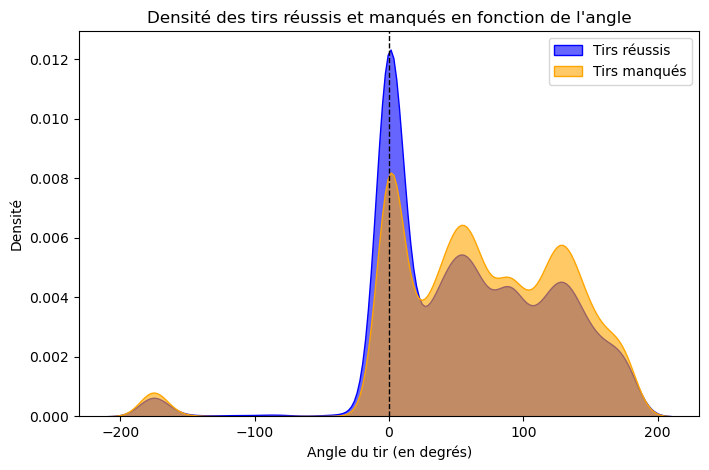

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calcul des angles
angles_made = np.arctan2(data[data['shot_made_flag'] == 1]['loc_y'], data[data['shot_made_flag'] == 1]['loc_x']) * 180 / np.pi
angles_missed = np.arctan2(data[data['shot_made_flag'] == 0]['loc_y'], data[data['shot_made_flag'] == 0]['loc_x']) * 180 / np.pi

# Création de la figure
plt.figure(figsize=(8, 5))

# Courbes de densité
sns.kdeplot(angles_made, fill=True, label="Tirs réussis", color="blue", alpha=0.6)
sns.kdeplot(angles_missed, fill=True, label="Tirs manqués", color="orange", alpha=0.6)

# Ajout des axes et légendes
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Ligne centrale (face au panier)
plt.xlabel("Angle du tir (en degrés)")
plt.ylabel("Densité")
plt.title("Densité des tirs réussis et manqués en fonction de l'angle")
plt.legend()
plt.show()


Fort pic à 0° → La majorité des tirs sont pris face au panier. Ces tirs ont un taux de réussite plus élevé (courbe bleue plus haute que la courbe orange).  
Asymétrie droite/gauche → Plus de tirs sont tentés du côté droit du terrain (>0°), mais la proportion de tirs manqués y est plus élevée qu'à 0°.  
Faible densité à -100° / -200° → Très peu de tirs sont tentés depuis ces angles, ce qui peut indiquer une faible variété des tirs en dehors des positions classiques.  

💡 Insights pour un Modèle de Prédiction  
✅ L’angle du tir est une variable clé → Il influence directement la probabilité de réussite.  
✅ Le pic de réussite à 0° peut être un bon indicateur → Prendre en compte la proximité angulaire avec cette zone.  
✅ L'asymétrie droite/gauche peut être testée → Intégrer loc_x et angle comme features pour voir si un côté est réellement plus favorable.  
✅ Tirer plus loin du panier ou avec un angle extrême semble risqué → La distance et l’angle doivent être combinés dans le modèle.

Tirs côté gauche: 11541 (45.76%)
Tirs côté droit: 13681 (54.24%)

Réussite à gauche: 3889 tirs (33.70%)
Réussite à droite: 4741 tirs (34.65%)

Échec à gauche: 7652 tirs (66.30%)
Échec à droite: 8940 tirs (65.35%)


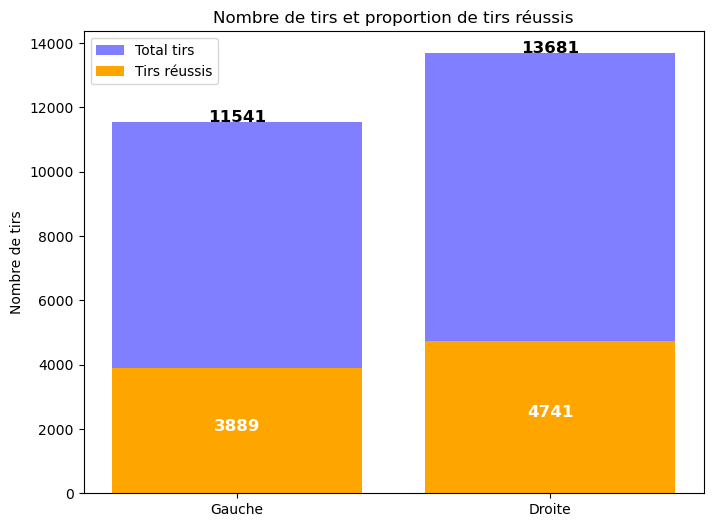

In [10]:
# Séparer les tirs en deux moitiés : gauche (x < 0) et droite (x > 0)
left_shots = data[data['loc_x'] < 0]
right_shots = data[data['loc_x'] > 0]

# Nombre total de tirs de chaque côté
left_total = left_shots.shape[0]
right_total = right_shots.shape[0]
total_shots = left_total + right_total

# Calcul du ratio de tirs à gauche vs à droite
left_ratio = left_total / total_shots * 100
right_ratio = right_total / total_shots * 100

# Proportion de tirs réussis par côté
left_made = left_shots[left_shots['shot_made_flag'] == 1].shape[0]
right_made = right_shots[right_shots['shot_made_flag'] == 1].shape[0]

# Proportion de tirs ratés par côté
left_missed = left_total - left_made
right_missed = right_total - right_made

left_made_ratio = left_made / left_total * 100 if left_total > 0 else 0
right_made_ratio = right_made / right_total * 100 if right_total > 0 else 0


left_missed_ratio = left_missed / left_total * 100 if left_total > 0 else 0
right_missed_ratio = right_missed / right_total * 100 if right_total > 0 else 0

# Création du graphique fusionné
fig, ax = plt.subplots(figsize=(8, 6))

x_labels = ["Gauche", "Droite"]
x = range(len(x_labels))

# Barre totale représentant le nombre de tirs
ax.bar(x, [left_total, right_total], color='blue', alpha=0.5, label="Total tirs")

# Barre interne pour les tirs réussis (en vert)
ax.bar(x, [left_made, right_made], color='orange', label="Tirs réussis")

# Ajout des annotations pour indiquer les valeurs
for i, (total, made) in enumerate(zip([left_total, right_total], [left_made, right_made])):
    ax.text(i, total + 2, f"{total}", ha='center', fontsize=12, fontweight='bold')  # Total tirs
    ax.text(i, made / 2, f"{made}", ha='center', color='white', fontsize=12, fontweight='bold')  # Tirs réussis

# Affichage des résultats
print(f"Tirs côté gauche: {left_total} ({left_ratio:.2f}%)")
print(f"Tirs côté droit: {right_total} ({right_ratio:.2f}%)\n")

print(f"Réussite à gauche: {left_made} tirs ({left_made_ratio:.2f}%)")
print(f"Réussite à droite: {right_made} tirs ({right_made_ratio:.2f}%)\n")

print(f"Échec à gauche: {left_missed} tirs ({left_missed_ratio:.2f}%)")
print(f"Échec à droite: {right_missed} tirs ({right_missed_ratio:.2f}%)")

# Configuration du graphique
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_title("Nombre de tirs et proportion de tirs réussis")
ax.set_ylabel("Nombre de tirs")
ax.legend()

plt.show()


Les joueurs semblent privilégier le côté droit, soit par confort (main dominante), soit par stratégie offensive.

La réussite est légèrement meilleure à droite, mais l'écart est trop faible pour être une vraie faiblesse du côté gauche.

Un modèle de prédiction pourrait intégrer cette asymétrie pour voir si elle varie selon d'autres facteurs (distance, type de tir, défense).

/tmp/ipykernel_13829/2567634062.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(zone_data['shot_zone_area'], rotation=30, ha='right')


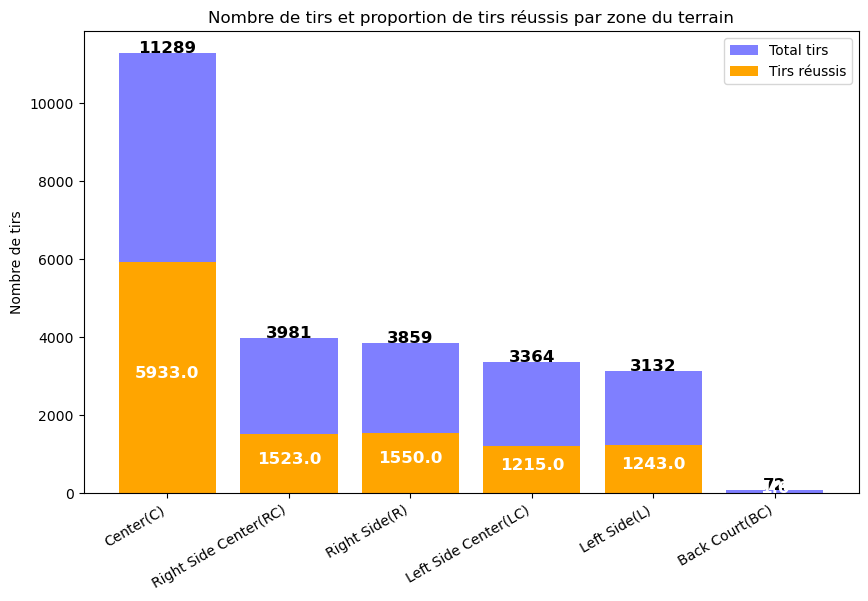

Zone: Center(C)
 - Total tirs: 11289
 - Tirs réussis: 5933.0 (52.56%)
 - Tirs ratés: 5356.0

Zone: Right Side Center(RC)
 - Total tirs: 3981
 - Tirs réussis: 1523.0 (38.26%)
 - Tirs ratés: 2458.0

Zone: Right Side(R)
 - Total tirs: 3859
 - Tirs réussis: 1550.0 (40.17%)
 - Tirs ratés: 2309.0

Zone: Left Side Center(LC)
 - Total tirs: 3364
 - Tirs réussis: 1215.0 (36.12%)
 - Tirs ratés: 2149.0

Zone: Left Side(L)
 - Total tirs: 3132
 - Tirs réussis: 1243.0 (39.69%)
 - Tirs ratés: 1889.0

Zone: Back Court(BC)
 - Total tirs: 72
 - Tirs réussis: 1.0 (1.39%)
 - Tirs ratés: 71.0



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouper les tirs par zone du terrain
zone_data = data.groupby('shot_zone_area').agg(
    total_shots=('shot_made_flag', 'size'),
    made_shots=('shot_made_flag', 'sum')
).reset_index()

# Calcul des tirs ratés et des ratios de réussite
zone_data['missed_shots'] = zone_data['total_shots'] - zone_data['made_shots']
zone_data['made_ratio'] = (zone_data['made_shots'] / zone_data['total_shots']) * 100

# Trier les zones pour un affichage cohérent
zone_data = zone_data.sort_values(by='total_shots', ascending=False)

# Création du graphique
fig, ax = plt.subplots(figsize=(10, 6))

# Barre totale représentant le nombre de tirs
ax.bar(zone_data['shot_zone_area'], zone_data['total_shots'], color='blue', alpha=0.5, label="Total tirs")

# Barre interne pour les tirs réussis (en orange)
ax.bar(zone_data['shot_zone_area'], zone_data['made_shots'], color='orange', label="Tirs réussis")

# Ajout des annotations pour les valeurs
for i, (total, made) in enumerate(zip(zone_data['total_shots'], zone_data['made_shots'])):
    ax.text(i, total + 2, f"{total}", ha='center', fontsize=12, fontweight='bold')  # Total tirs
    ax.text(i, made / 2, f"{made}", ha='center', color='white', fontsize=12, fontweight='bold')  # Tirs réussis

# Configuration du graphique
ax.set_xticklabels(zone_data['shot_zone_area'], rotation=30, ha='right')
ax.set_title("Nombre de tirs et proportion de tirs réussis par zone du terrain")
ax.set_ylabel("Nombre de tirs")
ax.legend()

plt.show()

# Affichage des résultats par zone
for _, row in zone_data.iterrows():
    print(f"Zone: {row['shot_zone_area']}")
    print(f" - Total tirs: {row['total_shots']}")
    print(f" - Tirs réussis: {row['made_shots']} ({row['made_ratio']:.2f}%)")
    print(f" - Tirs ratés: {row['missed_shots']}\n")


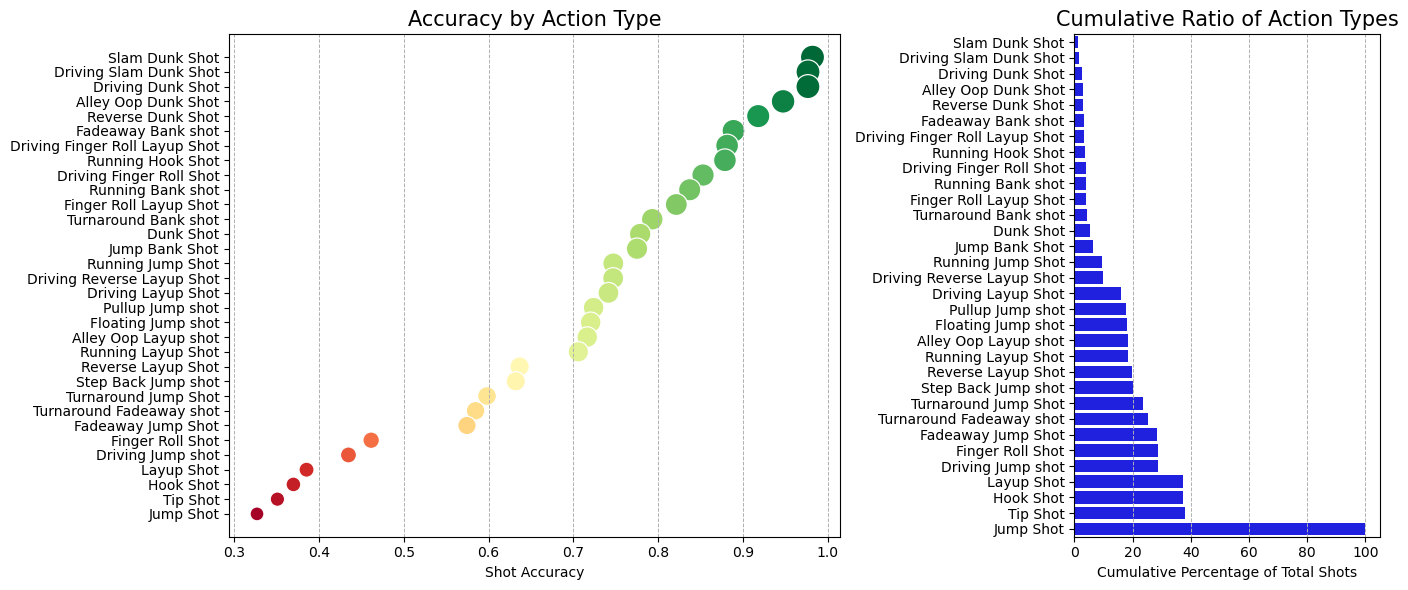

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by action_type and calculate accuracy and counts
grouped_data = data.groupby('action_type').agg(
    Accuracy=('shot_made_flag', 'mean'),
    counts=('shot_made_flag', 'size')
).reset_index()

# Filter out action types with counts <= 20
filtered_data = grouped_data[grouped_data['counts'] > 20]

# **Tri global basé sur Accuracy**
filtered_data = filtered_data.sort_values(by='Accuracy', ascending=False)  # **Trier par ordre décroissant**

# **Créer un ordre fixe des catégories**
action_order = filtered_data['action_type'].tolist()

# Calcul du ratio des tirs par action type
filtered_data['ratio'] = filtered_data['counts'] / filtered_data['counts'].sum() * 100

# **Ajout d'une colonne pour le ratio cumulé**
filtered_data['cumulative_ratio'] = filtered_data['ratio'].cumsum()

# Création des sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2, 1]})

# Graphique 1 : Accuracy par type d'action
sns.scatterplot(
    data=filtered_data,
    x='Accuracy',
    y='action_type',
    hue='Accuracy',
    size='Accuracy',
    sizes=(100, 300),
    palette=sns.color_palette("RdYlGn", as_cmap=True),
    legend=False,
    ax=axes[0]
)

# **On applique le même ordre aux deux graphiques**
axes[0].set_yticks(range(len(action_order)))
axes[0].set_yticklabels(action_order)

# Personnalisation
axes[0].set_title("Accuracy by Action Type", fontsize=15)
axes[0].set_ylabel('')
axes[0].set_xlabel('Shot Accuracy')
axes[0].grid(True, axis='x', linestyle='--', linewidth=0.7)

# Graphique 2 : Ratio des types d'actions CUMULÉ
sns.barplot(
    data=filtered_data,
    y='action_type',
    x='cumulative_ratio',  # **Utilisation du ratio cumulé**
    color="blue",  # Uniformisation de la couleur
    order=action_order,
    ax=axes[1]
)


# Personnalisation
axes[1].set_title("Cumulative Ratio of Action Types", fontsize=15)
axes[1].set_ylabel('')
axes[1].set_xlabel('Cumulative Percentage of Total Shots')
axes[1].grid(True, axis='x', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()


Le type de tir est le facteur le plus influent. Les dunks et layups ont un taux de réussite élevé, tandis que les jump shots et tirs à distance sont plus risqués. La distance et la position sont déterminantes : plus loin du panier, plus la probabilité de réussite diminue.

Le temps restant et la pression défensive peuvent impacter la réussite. Transformer les coordonnées en distance et angle simplifie l’analyse spatiale. Un Random Forest ou XGBoost capturera les interactions non linéaires.

Le modèle utilisera shot_distance, action_type, loc_x, loc_y, shot_type, period, shot_clock. Une validation croisée évitera le sur-apprentissage. L’évaluation se fera avec Accuracy, F1-score et AUC-ROC.

Les tirs avec le meilleur taux de réussite (dunks, layups) sont les moins tentés, alors que les tirs les plus fréquents (jump shots) ont un faible taux de réussite.

Le jump shot domine en volume mais affiche une précision bien inférieure aux tirs près du panier. Cette tendance reflète l’évolution du jeu vers des tirs à distance et des stratégies basées sur l’espace, mais elle souligne aussi une inefficacité potentielle.

Un modèle pourrait aider à optimiser la prise de décision, en recommandant des tirs plus efficaces selon la position et le contexte du match. Il permettrait aussi de détecter les joueurs qui prennent trop de tirs difficiles et d’adapter leur sélection de tirs.

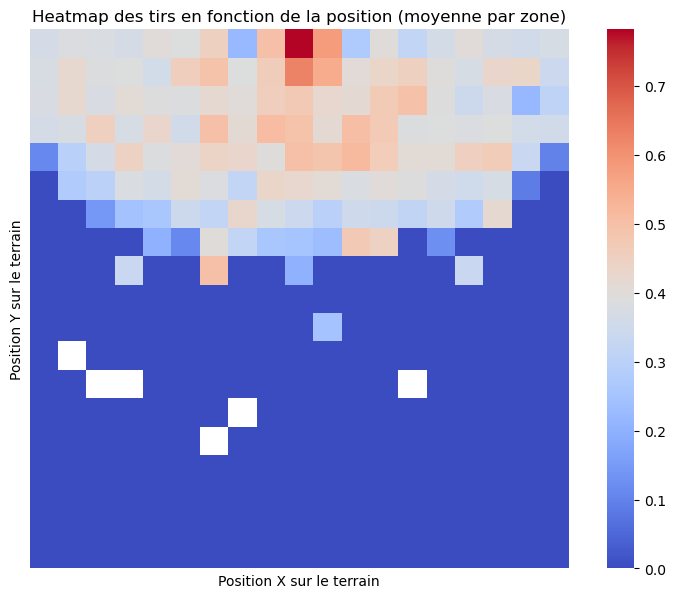

In [ ]:
# Définition de la taille de la grille (plus petit = plus précis)
grid_size = 20  # Nombre de cases en X et Y

# Création de la figure
plt.figure(figsize=(10, 7))

# Création d'une grille pour regrouper les tirs
x_bins = np.linspace(data['loc_x'].min(), data['loc_x'].max(), grid_size)
y_bins = np.linspace(data['loc_y'].min(), data['loc_y'].max(), grid_size)

# Calcul du nombre de tirs réussis et tentés par zone
heatmap_data = np.zeros((grid_size-1, grid_size-1))

for i in range(grid_size-1):
    for j in range(grid_size-1):
        # Sélection des tirs dans cette zone
        shots_in_cell = data[
            (data['loc_x'] >= x_bins[i]) & (data['loc_x'] < x_bins[i+1]) & 
            (data['loc_y'] >= y_bins[j]) & (data['loc_y'] < y_bins[j+1])
        ]
        
        # Calcul du taux de réussite (évite division par zéro)
        if len(shots_in_cell) > 0:
            heatmap_data[j, i] = shots_in_cell['shot_made_flag'].mean()

# Affichage de la heatmap sous forme de carrés
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, square=True, 
            xticklabels=False, yticklabels=False, cbar=True)

# Ajout du titre
plt.title("Heatmap des tirs en fonction de la position (moyenne par zone)")
plt.xlabel("Position X sur le terrain")
plt.ylabel("Position Y sur le terrain")

plt.show()


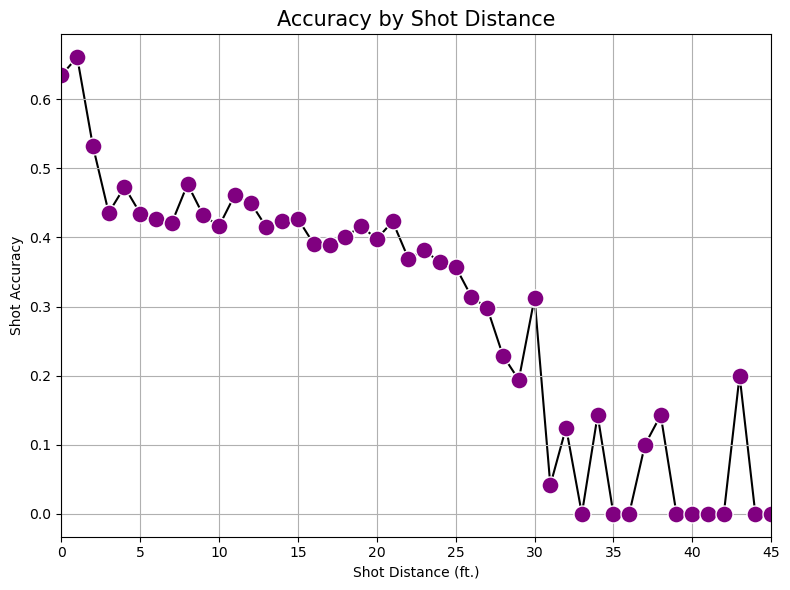

In [17]:
# Group by shot_distance and calculate mean accuracy
accuracy_by_distance = data.groupby('shot_distance')['shot_made_flag'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot
sns.scatterplot(
    data=accuracy_by_distance,
    x='shot_distance',
    y='shot_made_flag',
    s=150,
    color='purple',
    legend=False,
    zorder=2  # Set the order of scatter plot above line plot
)

# Line plot
sns.lineplot(
    data=accuracy_by_distance,
    x='shot_distance',
    y='shot_made_flag',
    marker='.',
    color='black',
    legend=False,
    zorder=1  # Set the order of line plot below scatter plot
)

plt.title('Accuracy by Shot Distance', fontsize=15)
plt.xlabel('Shot Distance (ft.)')
plt.ylabel('Shot Accuracy')
plt.xlim(0, 45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
nan_shots = data[data['shot_made_flag'].isna()]
data = data[~data.index.isin(nan_shots.index)]

In [12]:
corr_with_shot_made = data.corr()['shot_made_flag'].abs().sort_values(ascending=False)
print(corr_with_shot_made)

ValueError: could not convert string to float: 'Jump Shot'